In [1]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [2]:
cnx = sqlite3.connect('C:/Users/Jitesh Chandani/Desktop/database.sqlite')

In [3]:
c = cnx.cursor()

In [4]:
c.execute('SELECT * FROM player LIMIT 10')

In [5]:
c.fetchall()

[(1, 505942, 'Aaron Appindangoye', 218353, '1992-02-29 00:00:00', 182.88, 187),
 (2, 155782, 'Aaron Cresswell', 189615, '1989-12-15 00:00:00', 170.18, 146),
 (3, 162549, 'Aaron Doran', 186170, '1991-05-13 00:00:00', 170.18, 163),
 (4, 30572, 'Aaron Galindo', 140161, '1982-05-08 00:00:00', 182.88, 198),
 (5, 23780, 'Aaron Hughes', 17725, '1979-11-08 00:00:00', 182.88, 154),
 (6, 27316, 'Aaron Hunt', 158138, '1986-09-04 00:00:00', 182.88, 161),
 (7, 564793, 'Aaron Kuhl', 221280, '1996-01-30 00:00:00', 172.72, 146),
 (8, 30895, 'Aaron Lennon', 152747, '1987-04-16 00:00:00', 165.1, 139),
 (9, 528212, 'Aaron Lennox', 206592, '1993-02-19 00:00:00', 190.5, 181),
 (10, 101042, 'Aaron Meijers', 188621, '1987-10-28 00:00:00', 175.26, 170)]

In [6]:
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [8]:
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [9]:
df.isnull().sum()/len(df)*100

id                     0.000000
player_fifa_api_id     0.000000
player_api_id          0.000000
date                   0.000000
overall_rating         0.454402
potential              0.454402
preferred_foot         0.454402
attacking_work_rate    1.755645
defensive_work_rate    0.454402
crossing               0.454402
finishing              0.454402
heading_accuracy       0.454402
short_passing          0.454402
volleys                1.474633
dribbling              0.454402
curve                  1.474633
free_kick_accuracy     0.454402
long_passing           0.454402
ball_control           0.454402
acceleration           0.454402
sprint_speed           0.454402
agility                1.474633
reactions              0.454402
balance                1.474633
shot_power             0.454402
jumping                1.474633
stamina                0.454402
strength               0.454402
long_shots             0.454402
aggression             0.454402
interceptions          0.454402
position

In [10]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

In [11]:
df_cat=df.select_dtypes(include=['object'])
df_cat.head()


,date,preferred_foot,attacking_work_rate,defensive_work_rate
0,2016-02-18 00:00:00,right,medium,medium
1,2015-11-19 00:00:00,right,medium,medium
2,2015-09-21 00:00:00,right,medium,medium
3,2015-03-20 00:00:00,right,medium,medium
4,2007-02-22 00:00:00,right,medium,medium


Filtering Categorical Data

In [12]:
df_cat.drop('date',axis=1,inplace=True)
df_cat.head()

C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,preferred_foot,attacking_work_rate,defensive_work_rate
0,right,medium,medium
1,right,medium,medium
2,right,medium,medium
3,right,medium,medium
4,right,medium,medium


Filtering Numerical Data

In [13]:
num_vars=df.columns.difference(['preferred_foot','defensive_work_rate','attacking_work_rate'])

df_num=df[num_vars]

df_num.head(3)

,acceleration,aggression,agility,balance,ball_control,crossing,curve,date,dribbling,finishing,...,reactions,short_passing,shot_power,sliding_tackle,sprint_speed,stamina,standing_tackle,strength,vision,volleys
0,60.0,71.0,59.0,65.0,49.0,49.0,45.0,2016-02-18 00:00:00,51.0,44.0,...,47.0,61.0,55.0,69.0,64.0,54.0,69.0,76.0,54.0,44.0
1,60.0,71.0,59.0,65.0,49.0,49.0,45.0,2015-11-19 00:00:00,51.0,44.0,...,47.0,61.0,55.0,69.0,64.0,54.0,69.0,76.0,54.0,44.0
2,60.0,63.0,59.0,65.0,49.0,49.0,45.0,2015-09-21 00:00:00,51.0,44.0,...,47.0,61.0,55.0,69.0,64.0,54.0,66.0,76.0,54.0,44.0


In [14]:
df_num.drop(['date','id'],axis=1,inplace=True)
df_num.head()

C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,acceleration,aggression,agility,balance,ball_control,crossing,curve,dribbling,finishing,free_kick_accuracy,...,reactions,short_passing,shot_power,sliding_tackle,sprint_speed,stamina,standing_tackle,strength,vision,volleys
0,60.0,71.0,59.0,65.0,49.0,49.0,45.0,51.0,44.0,39.0,...,47.0,61.0,55.0,69.0,64.0,54.0,69.0,76.0,54.0,44.0
1,60.0,71.0,59.0,65.0,49.0,49.0,45.0,51.0,44.0,39.0,...,47.0,61.0,55.0,69.0,64.0,54.0,69.0,76.0,54.0,44.0
2,60.0,63.0,59.0,65.0,49.0,49.0,45.0,51.0,44.0,39.0,...,47.0,61.0,55.0,69.0,64.0,54.0,66.0,76.0,54.0,44.0
3,60.0,62.0,59.0,65.0,48.0,48.0,44.0,50.0,43.0,38.0,...,46.0,60.0,54.0,66.0,64.0,54.0,63.0,76.0,53.0,43.0
4,60.0,62.0,59.0,65.0,48.0,48.0,44.0,50.0,43.0,38.0,...,46.0,60.0,54.0,66.0,64.0,54.0,63.0,76.0,53.0,43.0


Handling Missing Values

In [15]:
#for categorical and continuous variables
df_num = df_num.apply(missing_imputation)

In [16]:
df_cat = df_cat.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [17]:
df_cat.isnull().sum()

preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
dtype: int64

In [18]:
df_num.isnull().sum()

acceleration          0
aggression            0
agility               0
balance               0
ball_control          0
crossing              0
curve                 0
dribbling             0
finishing             0
free_kick_accuracy    0
gk_diving             0
gk_handling           0
gk_kicking            0
gk_positioning        0
gk_reflexes           0
heading_accuracy      0
interceptions         0
jumping               0
long_passing          0
long_shots            0
marking               0
overall_rating        0
penalties             0
player_api_id         0
player_fifa_api_id    0
positioning           0
potential             0
reactions             0
short_passing         0
shot_power            0
sliding_tackle        0
sprint_speed          0
stamina               0
standing_tackle       0
strength              0
vision                0
volleys               0
dtype: int64

In [19]:
data_final = pd.concat([df_num,df_cat],axis = 1 )

In [20]:
data_final

,acceleration,aggression,agility,balance,ball_control,crossing,curve,dribbling,finishing,free_kick_accuracy,...,sliding_tackle,sprint_speed,stamina,standing_tackle,strength,vision,volleys,preferred_foot,attacking_work_rate,defensive_work_rate
0,60.0,71.0,59.0,65.0,49.0,49.0,45.0,51.0,44.0,39.0,...,69.0,64.0,54.0,69.0,76.0,54.0,44.0,right,medium,medium
1,60.0,71.0,59.0,65.0,49.0,49.0,45.0,51.0,44.0,39.0,...,69.0,64.0,54.0,69.0,76.0,54.0,44.0,right,medium,medium
2,60.0,63.0,59.0,65.0,49.0,49.0,45.0,51.0,44.0,39.0,...,69.0,64.0,54.0,66.0,76.0,54.0,44.0,right,medium,medium
3,60.0,62.0,59.0,65.0,48.0,48.0,44.0,50.0,43.0,38.0,...,66.0,64.0,54.0,63.0,76.0,53.0,43.0,right,medium,medium
4,60.0,62.0,59.0,65.0,48.0,48.0,44.0,50.0,43.0,38.0,...,66.0,64.0,54.0,63.0,76.0,53.0,43.0,right,medium,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,66.0,56.0,77.0,73.0,85.0,84.0,86.0,84.0,77.0,78.0,...,30.0,72.0,72.0,31.0,67.0,88.0,77.0,right,medium,low
183974,66.0,61.0,77.0,73.0,86.0,74.0,86.0,85.0,76.0,74.0,...,30.0,67.0,66.0,31.0,65.0,88.0,77.0,right,medium,low
183975,66.0,67.0,77.0,73.0,86.0,74.0,86.0,85.0,71.0,74.0,...,30.0,67.0,66.0,31.0,65.0,88.0,77.0,right,medium,low
183976,61.0,63.0,77.0,73.0,91.0,74.0,86.0,87.0,64.0,73.0,...,30.0,60.0,67.0,32.0,59.0,88.0,77.0,right,medium,low


<AxesSubplot:>

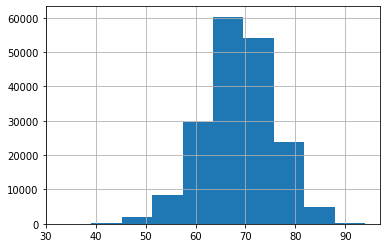

In [21]:
data_final.overall_rating.hist()

In [22]:
features = data_final[data_final.columns.difference( [ 'overall_rating'] )]
target = data_final['overall_rating']

In [23]:
features

,acceleration,aggression,agility,attacking_work_rate,balance,ball_control,crossing,curve,defensive_work_rate,dribbling,...,reactions,short_passing,shot_power,sliding_tackle,sprint_speed,stamina,standing_tackle,strength,vision,volleys
0,60.0,71.0,59.0,medium,65.0,49.0,49.0,45.0,medium,51.0,...,47.0,61.0,55.0,69.0,64.0,54.0,69.0,76.0,54.0,44.0
1,60.0,71.0,59.0,medium,65.0,49.0,49.0,45.0,medium,51.0,...,47.0,61.0,55.0,69.0,64.0,54.0,69.0,76.0,54.0,44.0
2,60.0,63.0,59.0,medium,65.0,49.0,49.0,45.0,medium,51.0,...,47.0,61.0,55.0,69.0,64.0,54.0,66.0,76.0,54.0,44.0
3,60.0,62.0,59.0,medium,65.0,48.0,48.0,44.0,medium,50.0,...,46.0,60.0,54.0,66.0,64.0,54.0,63.0,76.0,53.0,43.0
4,60.0,62.0,59.0,medium,65.0,48.0,48.0,44.0,medium,50.0,...,46.0,60.0,54.0,66.0,64.0,54.0,63.0,76.0,53.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,66.0,56.0,77.0,medium,73.0,85.0,84.0,86.0,low,84.0,...,86.0,89.0,76.0,30.0,72.0,72.0,31.0,67.0,88.0,77.0
183974,66.0,61.0,77.0,medium,73.0,86.0,74.0,86.0,low,85.0,...,74.0,84.0,75.0,30.0,67.0,66.0,31.0,65.0,88.0,77.0
183975,66.0,67.0,77.0,medium,73.0,86.0,74.0,86.0,low,85.0,...,74.0,84.0,75.0,30.0,67.0,66.0,31.0,65.0,88.0,77.0
183976,61.0,63.0,77.0,medium,73.0,91.0,74.0,86.0,low,87.0,...,69.0,86.0,72.0,30.0,60.0,67.0,32.0,59.0,88.0,77.0


In [24]:
features = pd.get_dummies(features, columns=['preferred_foot', 'attacking_work_rate', 'defensive_work_rate'])

In [25]:
features

,acceleration,aggression,agility,balance,ball_control,crossing,curve,dribbling,finishing,free_kick_accuracy,...,defensive_work_rate_9,defensive_work_rate__0,defensive_work_rate_ean,defensive_work_rate_es,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_o,defensive_work_rate_ormal,defensive_work_rate_tocky
0,60.0,71.0,59.0,65.0,49.0,49.0,45.0,51.0,44.0,39.0,...,0,0,0,0,0,0,1,0,0,0
1,60.0,71.0,59.0,65.0,49.0,49.0,45.0,51.0,44.0,39.0,...,0,0,0,0,0,0,1,0,0,0
2,60.0,63.0,59.0,65.0,49.0,49.0,45.0,51.0,44.0,39.0,...,0,0,0,0,0,0,1,0,0,0
3,60.0,62.0,59.0,65.0,48.0,48.0,44.0,50.0,43.0,38.0,...,0,0,0,0,0,0,1,0,0,0
4,60.0,62.0,59.0,65.0,48.0,48.0,44.0,50.0,43.0,38.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,66.0,56.0,77.0,73.0,85.0,84.0,86.0,84.0,77.0,78.0,...,0,0,0,0,0,1,0,0,0,0
183974,66.0,61.0,77.0,73.0,86.0,74.0,86.0,85.0,76.0,74.0,...,0,0,0,0,0,1,0,0,0,0
183975,66.0,67.0,77.0,73.0,86.0,74.0,86.0,85.0,71.0,74.0,...,0,0,0,0,0,1,0,0,0,0
183976,61.0,63.0,77.0,73.0,91.0,74.0,86.0,87.0,64.0,73.0,...,0,0,0,0,0,1,0,0,0,0


Train Test Split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

Selecting Important variable

In [27]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
print(model.feature_importances_)

[2.14983338e-03 3.42779872e-03 1.42507268e-03 1.53654438e-03
 5.21792125e-02 7.95540312e-03 1.54208120e-03 6.48169610e-03
 7.33000818e-03 1.38456498e-03 1.36090167e-02 7.28326095e-03
 4.39506108e-03 1.23493581e-02 5.83688477e-03 1.39426522e-02
 6.75112741e-03 1.92901776e-03 2.65106174e-03 2.99550859e-03
 9.16170803e-03 1.74843719e-03 1.13828505e-02 1.54524153e-02
 9.76989160e-03 2.37120143e-01 4.83347363e-01 4.00399258e-03
 7.89078447e-03 2.52456012e-03 2.81117286e-03 3.96798452e-03
 4.00858031e-02 8.43905670e-03 2.22734872e-03 1.66726553e-03
 9.35585549e-05 9.28725765e-05 5.00860034e-05 1.18722556e-04
 9.36297474e-06 5.12574488e-05 1.35944599e-04 3.47322153e-05
 2.74323521e-06 1.13708372e-06 1.78917202e-06 1.83658927e-05
 9.49245184e-06 5.55405265e-06 2.48343925e-06 5.03511365e-06
 7.31193607e-05 4.54413834e-06 5.65626014e-06 8.71486159e-07
 1.10236317e-04 1.04829401e-05 2.43237804e-06 9.43187758e-05
 7.40952622e-05 1.40664178e-04 7.23113698e-05 1.96058608e-05
 2.58275678e-06]


In [28]:
from sklearn.feature_selection import SelectFromModel
selection = SelectFromModel(model, threshold=0.01, prefit=True)

select_X_train = selection.transform(X_train)
select_X_test = selection.transform(X_test)
select_X_train.shape

(137983, 9)

In [32]:
selection.get_support()

array([False, False, False, False,  True, False, False, False, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False, False, False,  True,  True, False,  True,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [33]:
selected_feat= X_train.columns[(selection.get_support())]
print(selected_feat)

Index(['ball_control', 'gk_diving', 'gk_positioning', 'heading_accuracy',
       'player_api_id', 'player_fifa_api_id', 'potential', 'reactions',
       'standing_tackle'],
      dtype='object')


These are important variables which we have selected to build the model

In [34]:
select_X_train

array([[64., 12., 11., ..., 71., 58., 34.],
       [67.,  8., 12., ..., 69., 63., 58.],
       [79.,  9., 13., ..., 76., 77., 74.],
       ...,
       [71., 13., 21., ..., 82., 83., 77.],
       [64.,  7., 22., ..., 80., 69., 37.],
       [67.,  8.,  8., ..., 85., 79., 86.]])

In [35]:
select_X_test

array([[79., 10., 13., ..., 81., 66., 30.],
       [64.,  6., 13., ..., 72., 56., 56.],
       [74., 14., 16., ..., 70., 72., 30.],
       ...,
       [62.,  7., 14., ..., 79., 49., 31.],
       [73., 15.,  8., ..., 78., 66., 65.],
       [56.,  9., 10., ..., 62., 58., 56.]])

Standerdising the Data

In [36]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
x_scaled_train = scalar.fit_transform(select_X_train)
x_scaled_train

array([[ 0.0390308 , -0.16019778, -0.31949623, ..., -0.37370759,
        -0.88644198, -0.76236959],
       [ 0.23684688, -0.39815384, -0.25716698, ..., -0.67789192,
        -0.33979195,  0.35744693],
       [ 1.0281112 , -0.33866482, -0.19483772, ...,  0.38675323,
         1.19082814,  1.10399128],
       ...,
       [ 0.50060165, -0.10070877,  0.30379632, ...,  1.29930622,
         1.84680818,  1.24396834],
       [ 0.0390308 , -0.45764285,  0.36612557, ...,  0.99512189,
         0.31618809, -0.62239252],
       [ 0.23684688, -0.39815384, -0.506484  , ...,  1.75558271,
         1.40948815,  1.66389953]])

In [37]:
x_scaled_test = scalar.fit_transform(select_X_test)
x_scaled_test

array([[ 1.03414986, -0.28076267, -0.19547747, ...,  1.14364683,
        -0.00999998, -0.95078517],
       [ 0.04413537, -0.51774909, -0.19547747, ..., -0.22327523,
        -1.10911039,  0.26174128],
       [ 0.70414503, -0.04377625, -0.00935493, ..., -0.52703569,
         0.64946626, -0.95078517],
       ...,
       [-0.08786656, -0.45850249, -0.13343662, ...,  0.83988637,
        -1.87848768, -0.90414954],
       [ 0.63814406,  0.01547035, -0.50568169, ...,  0.68800614,
        -0.00999998,  0.68146198],
       [-0.48387235, -0.34000928, -0.3816    , ..., -1.74207752,
        -0.88928831,  0.26174128]])

# Linear Regression

In [38]:
linear_reg = LinearRegression()
linear_reg.fit(x_scaled_train, y_train)

LinearRegression()

In [39]:
linear_reg.score(x_scaled_test, y_test)


0.8386389851692226

# Decision Tree

In [40]:
decision_tree = DecisionTreeRegressor(criterion='mse', random_state=0)         #estimator
decision_tree.fit(x_scaled_train, y_train)

DecisionTreeRegressor(random_state=0)

In [41]:
decision_tree.score(x_scaled_test, y_test)


0.9386076655607629

In [44]:
from sklearn.model_selection import train_test_split,GridSearchCV

param_grid = {'max_depth': [3, 5, 7, 9, 13],
             'criterion': ['mse', 'friedman_mse']}

grid = GridSearchCV(decision_tree, param_grid=param_grid, cv=5)

In [45]:
grid.fit(select_X_train, y_train)          #training


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [3, 5, 7, 9, 13]})

In [46]:
grid.best_params_

{'criterion': 'mse', 'max_depth': 13}

In [47]:
grid.best_estimator_

DecisionTreeRegressor(max_depth=13, random_state=0)

In [48]:
new_deci_tree = DecisionTreeRegressor(criterion='mse', max_depth=13,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')
new_deci_tree.fit(x_scaled_train, y_train)

C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\sklearn\tree\_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


DecisionTreeRegressor(max_depth=13, presort=False, random_state=0)

In [49]:
new_deci_tree.score(x_scaled_test, y_test)


0.9157912249882267

# Random Forest

In [50]:
rand_forest = RandomForestRegressor(random_state=123)
rand_forest.fit(x_scaled_train, y_train)

RandomForestRegressor(random_state=123)

In [51]:
rand_forest.score(x_scaled_test, y_test)

0.9684819916835224

In [54]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(test_size=0.2, random_state=0)

param_grid = {'max_features':['sqrt', 'log2', 9],
              'max_depth':[9, 11, 13]}                 

grid = GridSearchCV(rand_forest, param_grid=param_grid, cv=cv)

In [58]:
new_rand_forest = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features=9, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)
new_rand_forest.fit(x_scaled_train, y_train)

RandomForestRegressor(max_depth=13, max_features=9, n_estimators=10, n_jobs=1,
                      random_state=42)

In [59]:
new_rand_forest.score(x_scaled_test, y_test)


0.9340643949972547

# XGBoost

In [60]:
from xgboost.sklearn import XGBRegressor
xgr = XGBRegressor(random_state=42)
xgr.fit(x_scaled_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
xgr.score(x_scaled_test, y_test)

0.9306789864361424

In [62]:
cv = ShuffleSplit(n_splits=10, random_state=0)

param_grid = {'max_depth': [5, 7],
              'learning_rate': [0.1, 0.3]}

grid = GridSearchCV(xgr, param_grid=param_grid, cv=cv, n_jobs= -1)

In [63]:
#grid.fit(x_scaled_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=None, train_size=None),
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, random_state=42,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate

In [64]:
#grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [66]:
new_xgr = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=7,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
new_xgr.fit(x_scaled_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
new_xgr.score(x_scaled_test, y_test)

0.9354249710552095

In [78]:
print("""Linear Regressor accuracy is {lin}
DecisionTree Regressor accuracy is {Dec}
RandomForest regressor accuracy is {ran}
XGBoost regressor accuracy is {xgb}""".format(lin=linear_reg.score(x_scaled_test, y_test),
                                                       Dec=decision_tree.score(x_scaled_test, y_test),
                                                       ran = rand_forest.score(x_scaled_test, y_test),
                                                       xgb = xgr.score(x_scaled_test, y_test)))

Linear Regressor accuracy is 0.8386389851692226
DecisionTree Regressor accuracy is 0.9386076655607629
RandomForest regressor accuracy is 0.9684819916835224
XGBoost regressor accuracy is 0.9306789864361424


In [79]:
rand_forest.predict([[1,2,3,4,5,6,7,8,9]])

array([89.80666667])

By accuracy comparision performed above we can say hear that Random Forest regressor gives better result than any other model. and it can predict the target function with approx 97% accuracy.

In [80]:
import pickle
pickle.dump(rand_forest, open('rand_forest.pickle','wb'))